In [5]:
#import ggplot as gpt
import pandas as pd
import numpy as np 
import os
os.chdir("D://AP//PythonLen//PKG_SPEC_TurnRate//")
import ConnectDB as cn

In [6]:
# 料號取 ENG_SPEC_ID 
def GetENGSPEC_ID(part='95.S3806.W0A0B6N'):
    sSQL=" SELECT S.PART_NO, "
    sSQL+="        S.SN, "
    sSQL+="        S.SET_NO, "
    sSQL+="        S.VERSION, "
    sSQL+="        S.ENG_SPEC_ID, "
    sSQL+="        S.CUSTOMER_MODEL_NAME, "
    sSQL+="        E.NAMING_RULE_NUMBER, "
    sSQL+="        E.PART_NO AS PKG_PART "
    sSQL+="   FROM R_SPEC_SET_DATA AS S, DBO.R_ENG_SPEC_VER AS E "
    sSQL+="  WHERE S.ACTIVE = 'Y' "
    sSQL+="    AND (S.PART_NO = '"+part+"' OR "
    sSQL+="        S.CHILD_PART_NO = '"+part+"') "
    sSQL+="    AND E.ISMODIFY = 'Y' "
    sSQL+="    AND E.SEQ_NO = S.ENG_SPEC_ID "
    sSQL+="  ORDER BY S.PART_NO "
    return sSQL

In [7]:
# ENG_SPEC_ID 取 CIE 標
def GetCEI_BASE(ENG_SPEC_ID=10949):
    sSQL=" SELECT MODEL_NAME, "
    sSQL+="        PART_NO, "
    sSQL+="        MAX_WIDTH, "
    sSQL+="        MAX_HEIGHT, "
    sSQL+="        BAS.BASE_ID, "
    sSQL+="        LEFT_TOP_X, "
    sSQL+="        LEFT_TOP_Y, "
    sSQL+="        LEFT_BOTTOM_X, "
    sSQL+="        LEFT_BOTTOM_Y, "
    sSQL+="        RIGHT_BOTTOM_X, "
    sSQL+="        RIGHT_BOTTOM_Y, "
    sSQL+="        RIGHT_TOP_X, "
    sSQL+="        RIGHT_TOP_Y, "
    sSQL+="        POS_X, "
    sSQL+="        POS_Y, "
    sSQL+="        POS_ID "
    sSQL+="   FROM R_CIE_BASE_DATA AS BAS, C_CIE_BASE AS CIE "
    sSQL+="  WHERE CIE.ACTIVE = 1 "
    sSQL+="    AND CIE.ENG_SPEC_ID = "+str(ENG_SPEC_ID)
    sSQL+="    AND BAS.BASE_ID = CIE.BASE_ID "
    return sSQL

In [8]:
# 取 eng_spec_id
strSql=GetENGSPEC_ID('95.S3806.W0A0B6N')
dbCon=cn.OracCn()
dfPMSpecName=dbCon.ExecMSSql_Commend(dbCon.lexmsdb2,'PLANNING',strSql)
dfPMSpecName.head(2)

2019-02-01 11:17:37,741 INFO sqlalchemy.engine.base.Engine select @@version
2019-02-01 11:17:37,741 INFO sqlalchemy.engine.base.Engine {}
2019-02-01 11:17:37,741 INFO sqlalchemy.engine.base.Engine SELECT schema_name()
2019-02-01 11:17:37,755 INFO sqlalchemy.engine.base.Engine {}
2019-02-01 11:17:37,829 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-02-01 11:17:37,829 INFO sqlalchemy.engine.base.Engine {}
2019-02-01 11:17:37,829 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS NVARCHAR(60)) AS anon_1
2019-02-01 11:17:37,834 INFO sqlalchemy.engine.base.Engine {}
2019-02-01 11:17:37,839 INFO sqlalchemy.engine.base.Engine  SELECT S.PART_NO,         S.SN,         S.SET_NO,         S.VERSION,         S.ENG_SPEC_ID,         S.CUSTOMER_MODEL_NAME,         E.NAMING_RULE_NUMBER,         E.PART_NO AS PKG_PART    FROM R_SPEC_SET_DATA AS S, DBO.R_ENG_SPEC_VER AS E   WHERE S.ACTIVE = 'Y'     AND (S.PART_NO = '95.S3806.W0A0B6

PART_NO     SN  SET_NO  VERSION  ENG_SPEC_ID CUSTOMER_MODEL_NAME  \
0  95.S3806.W0A0B6N  26369       3        0        10949         B140HAK01.3   
1  95.S3806.W0A0B6N  26370       4        0        10949         B140HAK01.0   

   NAMING_RULE_NUMBER          PKG_PART  
0                  11  95.S3806.W0A0B6N  
1                  11  95.S3806.W0A0B6N

In [29]:
# 確認 1 各料號 1 組 ENG SPEC ID
iCount=len(pd.unique(dfPMSpecName['ENG_SPEC_ID']))
if iCount==1 :
    strSql=GetCEI_BASE(dfPMSpecName.loc[1,'ENG_SPEC_ID'])
    dfCIEPos=dbCon.ExecMSSql_Commend(dbCon.lexmsdb2,'PLANNING',strSql)
dfCIEPos.head(2)

MODEL_NAME           PART_NO  MAX_WIDTH  MAX_HEIGHT  BASE_ID  LEFT_TOP_X  \
0  PS06W12.2  95.S3806.W0A0B6N         20           4    20183      0.2607   
1  PS06W12.2  95.S3806.W0A0B6N         20           4    20183      0.2631   

   LEFT_TOP_Y  LEFT_BOTTOM_X  LEFT_BOTTOM_Y  RIGHT_BOTTOM_X  RIGHT_BOTTOM_Y  \
0      0.2474         0.2631         0.2512          0.2694          0.2409   
1      0.2512         0.2654         0.2549          0.2717          0.2446   

   RIGHT_TOP_X  RIGHT_TOP_Y  POS_X  POS_Y POS_ID  
0       0.2670       0.2371      0      0  ABB0X  
1       0.2694       0.2409      1      0  BBB0X

In [61]:
# 整理 X,Y,POS
X1=dfCIEPos.loc[:,['POS_ID','POS_X','POS_Y','LEFT_TOP_X','LEFT_TOP_Y']].copy()
X2=dfCIEPos.loc[:,['POS_ID','POS_X','POS_Y','LEFT_BOTTOM_X','LEFT_BOTTOM_Y']].copy()
X3=dfCIEPos.loc[:,['POS_ID','POS_X','POS_Y','RIGHT_BOTTOM_X','RIGHT_BOTTOM_Y']].copy()
X4=dfCIEPos.loc[:,['POS_ID','POS_X','POS_Y','RIGHT_TOP_X','RIGHT_TOP_Y']].copy()
X1.columns=['POS_ID','POS_X','POS_Y','X','Y']
X2.columns=['POS_ID','POS_X','POS_Y','X','Y']
X3.columns=['POS_ID','POS_X','POS_Y','X','Y']
X4.columns=['POS_ID','POS_X','POS_Y','X','Y']

In [62]:
# merage
X1=X1.append([X2,X3,X4])
del X2,X3,X4

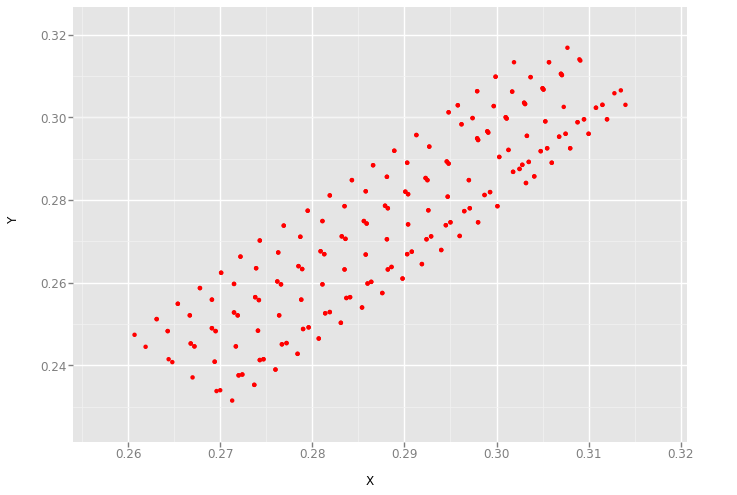

<ggplot: (-9223371965205872808)>

In [91]:
gpt.ggplot(X1,gpt.aes(x='X',y='Y'))+gpt.geom_point(color='red')

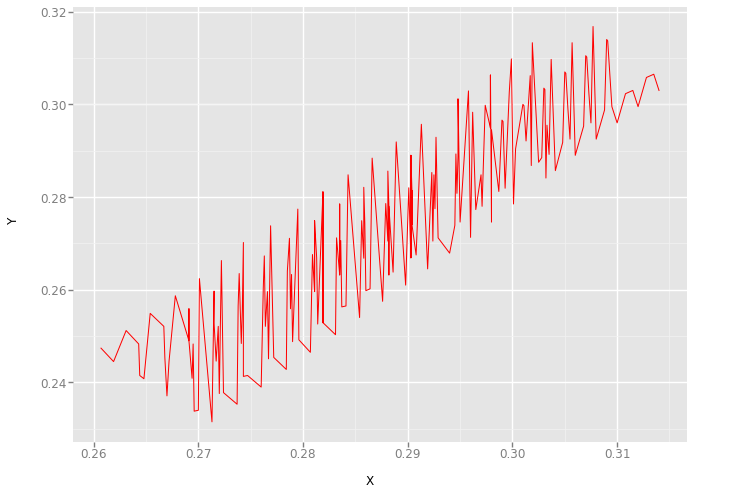

<ggplot: (-9223371965209487535)>

In [117]:
gpt.ggplot(X1,gpt.aes(x='X',y='Y'))+gpt.geom_line(color='red')

In [153]:
dfCIEPos.loc[dfCIEPos['POS_ID']=='ABB0X']


MODEL_NAME           PART_NO  MAX_WIDTH  MAX_HEIGHT  BASE_ID  LEFT_TOP_X  \
0  PS06W12.2  95.S3806.W0A0B6N         20           4    20183      0.2607   

   LEFT_TOP_Y  LEFT_BOTTOM_X  LEFT_BOTTOM_Y  RIGHT_BOTTOM_X  RIGHT_BOTTOM_Y  \
0      0.2474         0.2631         0.2512          0.2694          0.2409   

   RIGHT_TOP_X  RIGHT_TOP_Y  POS_X  POS_Y POS_ID  
0        0.267       0.2371      0      0  ABB0X

In [149]:
X1=X1.sort_values(by=['POS_X','POS_Y'])
X1.head(5)

POS_ID  POS_X  POS_Y       X       Y
0   ABB0X      0      0  0.2607  0.2474
0   ABB0X      0      0  0.2631  0.2512
0   ABB0X      0      0  0.2670  0.2371
0   ABB0X      0      0  0.2694  0.2409
18  ABC0X      0      1  0.2619  0.2445

In [151]:
Z1=X1.loc[X1['POS_ID']=='ABB0X']
Z1

POS_ID  POS_X  POS_Y       X       Y
0  ABB0X      0      0  0.2607  0.2474
0  ABB0X      0      0  0.2631  0.2512
0  ABB0X      0      0  0.2670  0.2371
0  ABB0X      0      0  0.2694  0.2409

In [146]:
Z1.iloc[2]['POS_X']

0

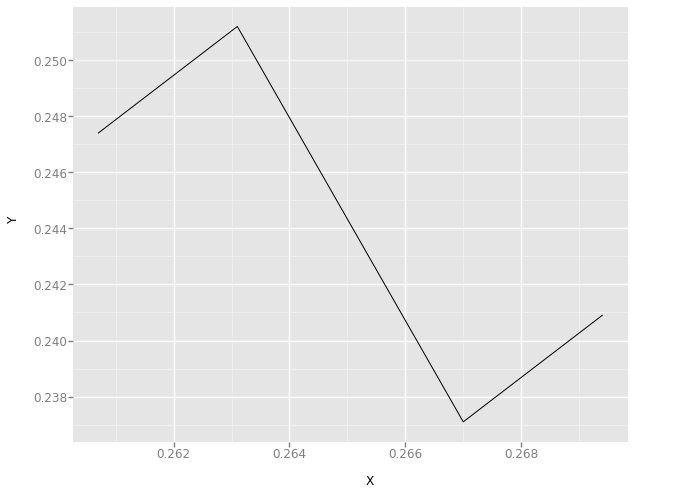

<ggplot: (71652604459)>

In [152]:
(gpt.ggplot(Z1,gpt.aes(x='X',y='Y',group='POS_ID'))+gpt.geom_path())

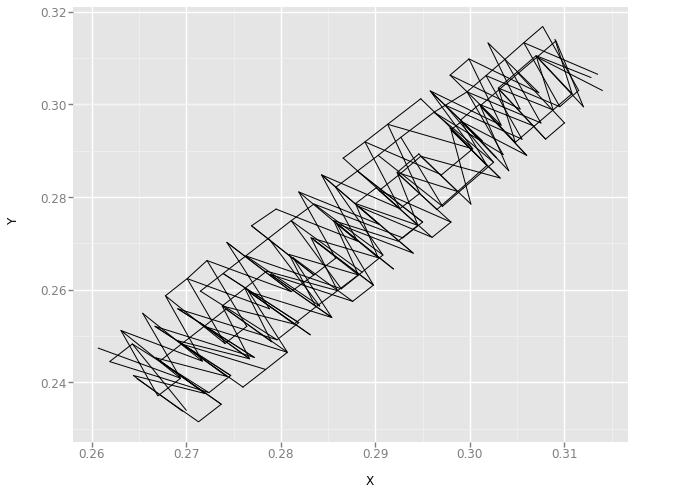

<ggplot: (-9223371965209519223)>

In [118]:
gpt.ggplot(X1,gpt.aes(x='X',y='Y',group='POS_ID'))+gpt.geom_path()